# postmortem for Event Correlation.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_context('talk',font_scale=.8)

In [2]:
x1 = np.array([[1,2,3,4,5],[6,7,8,9,10]])
#x2 = np.array([[10,0.2,67,95,5],[0.7,0.2,20,10,19]])
x2 = np.array([[10,20,30,40,50],[60,70,80,90,100]])
#x2 = np.array([[1,2,3,4,5],[6,7,8,9,10]])

#x1 = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
#x2 = np.array([[10],[0.2],[67],[95],[5],[0.7],[0.2],[20],[10],[19]])
#x2 = np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])

#x1 = np.array([[1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10]])
#x2 = np.array([[1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10]])

In [3]:
df1 = pd.read_csv('data.csv')
df1.index = pd.to_datetime(df1['dateTimeStamp'])

print(df_all_y.head())

                         memory_used_pct  cpu_user_pct  diskio_serviceTime  \
dateTimeStamp                                                                
2019-03-01 00:00:08.066            76.52           5.0                 0.0   
2019-03-01 00:00:08.066            76.56           5.0                 0.0   
2019-03-01 00:00:08.066            76.52           5.0                 0.0   
2019-03-01 00:00:08.066            76.52           5.0                 0.0   
2019-03-01 00:00:08.066            76.52           5.0                 0.0   

                         load_1min  
dateTimeStamp                       
2019-03-01 00:00:08.066       1.75  
2019-03-01 00:00:08.066       1.75  
2019-03-01 00:00:08.066       1.75  
2019-03-01 00:00:08.066       1.75  
2019-03-01 00:00:08.066       1.75  


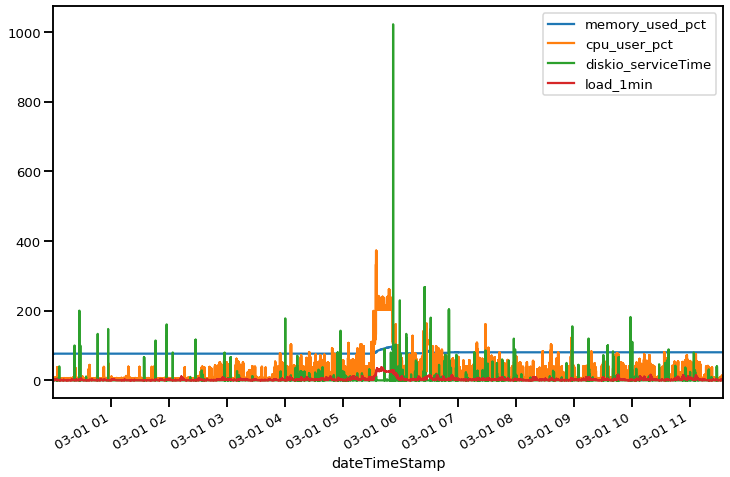

In [4]:
df_all_y.plot(figsize=(12,8))

# Test of Event Correlation at same time.

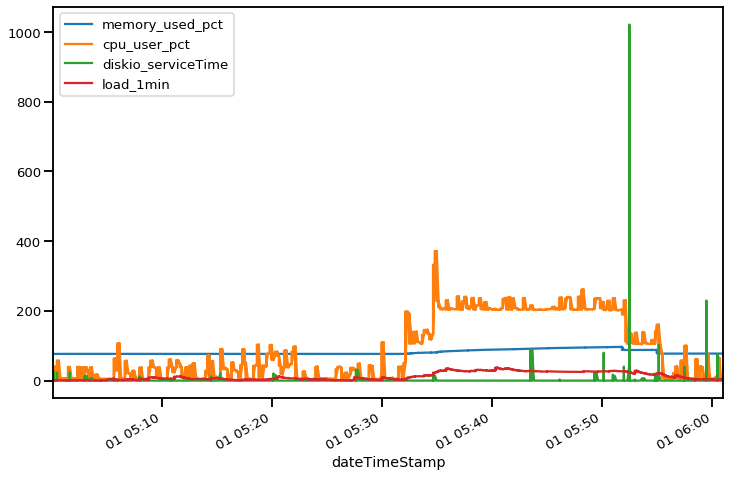

In [4]:
df_all_y.loc['2019-03-01 05:00':'2019-03-01 06:00'].plot(figsize=(12,8))

In [91]:
df_col_minmax = [(col,df_all_y[col].min(),df_all_y[col].max()) for col in df_all_y.columns]
print("(col,min,max) : ",df_col_minmax)

(col,min,max) :  [('memory_used_pct', 76.47, 96.86), ('cpu_user_pct', 2.6100000000000003, 371.96), ('diskio_serviceTime', 0.0, 1021.53845), ('load_1min', 0.0, 37.62)]


# Test of Event Correlation with time delay.

In [88]:
df_test1 = df_all_y.loc['2019-03-01 04:00':'2019-03-01 06:00'].reset_index()
df_test1.drop('dateTimeStamp', axis=1, inplace=True)
#df_test1.plot(figsize=(12,8))

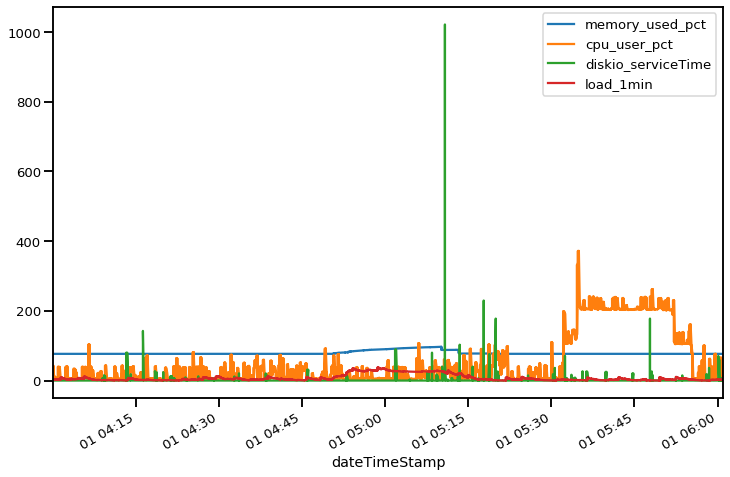

In [87]:
dftest2 = df_test1.copy()
a1 = np.concatenate((dftest2.memory_used_pct[:2000].values, dftest2.memory_used_pct[:1000].values))
a2 = np.concatenate((dftest2.diskio_serviceTime[:2000].values, dftest2.diskio_serviceTime[:1000].values))
a3 = np.concatenate((dftest2.load_1min[:2000].values, dftest2.load_1min[:1000].values))

dftest2.memory_used_pct = dftest2.memory_used_pct.shift(-3000)
dftest2.diskio_serviceTime = dftest2.diskio_serviceTime.shift(-3000)
dftest2.load_1min = dftest2.load_1min.shift(-3000)

dftest2.loc[len(dftest2)-3000:,'memory_used_pct'] = a1
dftest2.loc[len(dftest2)-3000:,'diskio_serviceTime'] = a2
dftest2.loc[len(dftest2)-3000:,'load_1min'] = a3

dftest2.index = df_all_y.loc['2019-03-01 04:00':'2019-03-01 06:00'].index

#dftest2.head()
dftest2.plot(figsize=(12,8))

In [90]:
df_col_minmax = [(col,dftest2[col].min(),dftest2[col].max()) for col in dftest2.columns]
print("(col,min,max) : ",df_col_minmax)

(col,min,max) :  [('memory_used_pct', 76.53, 96.86), ('cpu_user_pct', 3.2099999999999995, 371.96), ('diskio_serviceTime', 0.0, 1021.53845), ('load_1min', 0.13, 37.62)]


### Follow df_all_y( OR df) for same-time correlation & dftest2 for time-delay correlation.

# Preprocess Begin

# Transformation

In [ ]:
# log transformation

df_col_minmax = [(df_all_y[col].max(),df_all_y[col].min()) for col in df_all_y.columns]
print(df_col_minmax)

df_all_y.memory_used_pct = np.log(df_all_y.memory_used_pct).replace(-np.inf, 0.0)
df_all_y.cpu_user_pct = np.log(df_all_y.cpu_user_pct).replace(-np.inf, 0.0)
df_all_y.diskio_serviceTime = np.log(df_all_y.diskio_serviceTime).replace(-np.inf, 0.0)
df_all_y.load_1min = np.log(df_all_y.load_1min).replace(-np.inf, 0.0)

df_col_minmax = [(df_all_y[col].max(),df_all_y[col].min()) for col in df_all_y.columns]
print(df_col_minmax)

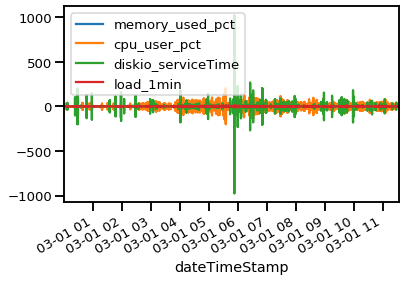

In [121]:
# 1 period(lag) differnce transformation
# create a differenced series
from pandas import Series

df_all_y_diff = df_all_y.copy()
df_all_y_diff.memory_used_pct = df_all_y_diff.memory_used_pct.diff()
df_all_y_diff.cpu_user_pct = df_all_y_diff.cpu_user_pct.diff()
df_all_y_diff.diskio_serviceTime = df_all_y_diff.diskio_serviceTime.diff()
df_all_y_diff.load_1min = df_all_y_diff.load_1min.diff()
df_all_y_diff.plot(figsize=(12,8))

# Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
from numpy import array
# define dataset
#data = [x for x in range(1, 10)]
#data = array(data).reshape(len(data), 1)
#print(data)
def func_transform(data):
    data = array(data).reshape(len(data), 1)
    # fit transform
    transformer = StandardScaler()
    transformer.fit(data)
    # difference transform
    transformed = transformer.transform(data)
    return transformed

transformed = func_transform(data)
print(transformed)
# invert difference
#inverted = transformer.inverse_transform(transformed)
#print(inverted)

In [ ]:
df_col_minmax = [(df_all_y[col].max(),df_all_y[col].min()) for col in df_all_y.columns]
print(df_col_minmax)

df_all_y.memory_used_pct = func_transform(df_all_y.memory_used_pct)
df_all_y.cpu_user_pct = func_transform(df_all_y.cpu_user_pct)
df_all_y.diskio_serviceTime = func_transform(df_all_y.diskio_serviceTime)
df_all_y.load_1min = func_transform(df_all_y.load_1min)

df_col_minmax = [(df_all_y[col].max(),df_all_y[col].min()) for col in df_all_y.columns]
print(df_col_minmax)

# Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from numpy import array
# define dataset
#data = [x for x in range(1, 10)]
#data = array(data).reshape(len(data), 1)
#print(data)
def func_normalize(data):
    data = array(data).reshape(len(data), 1)
    # fit transform
    transformer = MinMaxScaler()
    transformer.fit(data)
    # difference transform
    transformed = transformer.transform(data)
    return transformed

transformed = func_normalize(data)
print(transformed)

# invert difference
#inverted = transformer.inverse_transform(transformed)
#print(inverted)

In [ ]:
df_col_minmax = [(df_all_y[col].max(),df_all_y[col].min()) for col in df_all_y.columns]
print(df_col_minmax)

df_all_y.memory_used_pct = func_normalize(df_all_y.memory_used_pct)
df_all_y.cpu_user_pct = func_normalize(df_all_y.cpu_user_pct)
df_all_y.diskio_serviceTime = func_normalize(df_all_y.diskio_serviceTime)
df_all_y.load_1min = func_normalize(df_all_y.load_1min)

df_col_minmax = [(df_all_y[col].max(),df_all_y[col].min()) for col in df_all_y.columns]
print(df_col_minmax)

# Preprocess End

# Pearson correlation

Pandas computed Pearson r: 0.9143763541209827
Scipy computed Pearson r: 0.9143763541209762 and p-value: 0.0


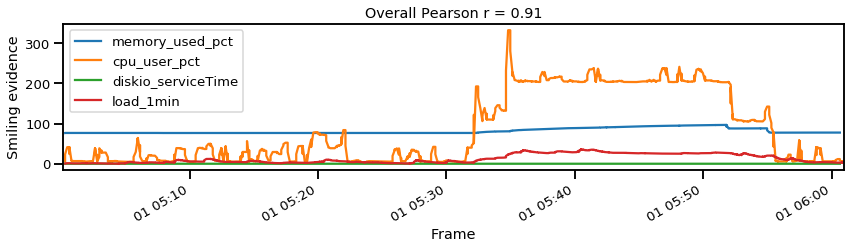

In [7]:
df = df_all_y.loc['2019-03-01 05:00':'2019-03-01 06:00']#pd.read_csv('synchrony_sample.csv')
overall_pearson_r = df[['cpu_user_pct','load_1min']].corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(df.dropna()['cpu_user_pct'], df.dropna()['load_1min'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r: -0.2534163364268648
Scipy computed Pearson r: -0.2534163364268698 and p-value: 9.758995832231046e-128


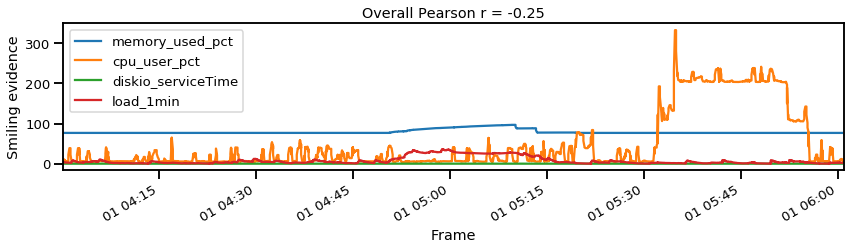

In [92]:
overall_pearson_r = dftest2[['cpu_user_pct','load_1min']].corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(dftest2.dropna()['cpu_user_pct'], dftest2.dropna()['load_1min'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
dftest2.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r: 0.865793435563808
Scipy computed Pearson r: 0.8657934355638066 and p-value: 0.0


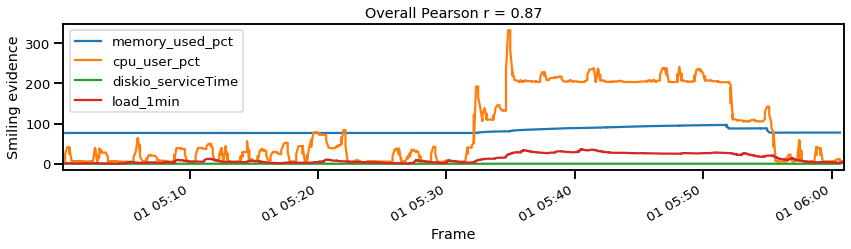

In [8]:
df = df_all_y.loc['2019-03-01 05:00':'2019-03-01 06:00']#pd.read_csv('synchrony_sample.csv')
overall_pearson_r = df[['cpu_user_pct','memory_used_pct']].corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(df.dropna()['cpu_user_pct'], df.dropna()['memory_used_pct'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r: -0.2135547622329268
Scipy computed Pearson r: -0.21355476223293265 and p-value: 2.0712276074240383e-90


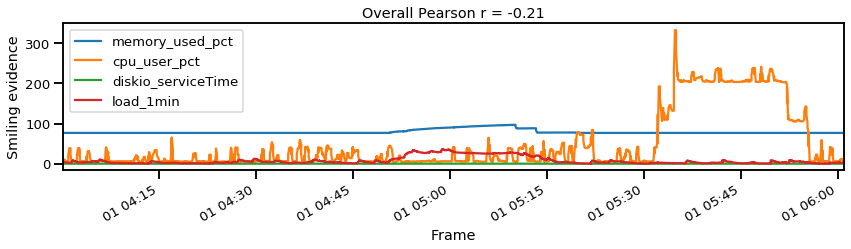

In [93]:
overall_pearson_r = dftest2[['cpu_user_pct','memory_used_pct']].corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(dftest2.dropna()['cpu_user_pct'], dftest2.dropna()['memory_used_pct'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
dftest2.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r: 0.020142515009691057
Scipy computed Pearson r: 0.020142515009691678 and p-value: 0.1819930464072894


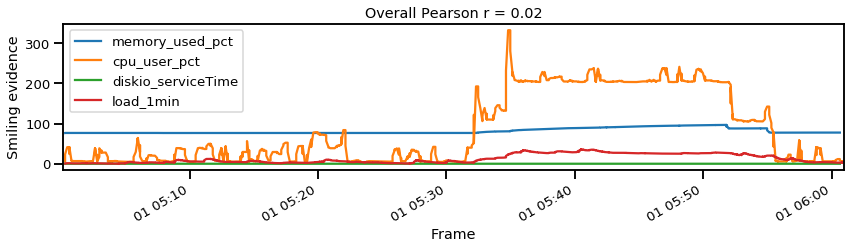

In [97]:
df = df_all_y.loc['2019-03-01 05:00':'2019-03-01 06:00']#pd.read_csv('synchrony_sample.csv')
overall_pearson_r = df[['cpu_user_pct','diskio_serviceTime']].corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(df.dropna()['cpu_user_pct'], df.dropna()['diskio_serviceTime'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r: 0.0013499620502540506
Scipy computed Pearson r: 0.001349962050253995 and p-value: 0.8997439062455032


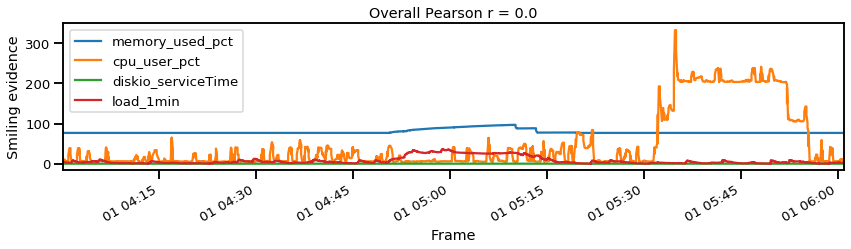

In [94]:
overall_pearson_r = dftest2[['cpu_user_pct','diskio_serviceTime']].corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(dftest2.dropna()['cpu_user_pct'], dftest2.dropna()['diskio_serviceTime'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
dftest2.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

# Time Lagged Cross Correlation

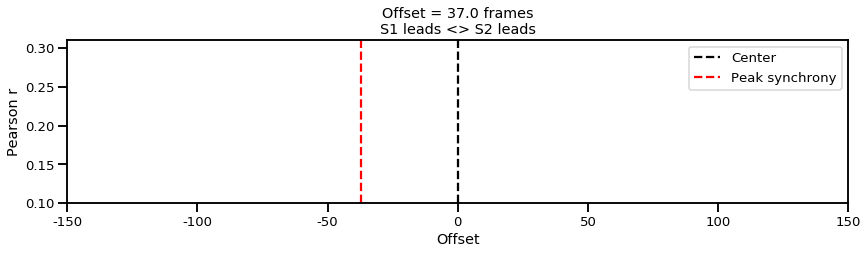

In [98]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['cpu_user_pct']
d2 = df['load_1min']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,300], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);
plt.legend()

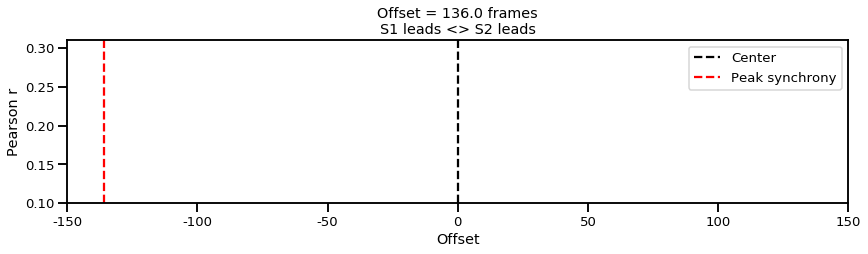

In [101]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['cpu_user_pct']
d2 = df['diskio_serviceTime']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,300], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);
plt.legend()

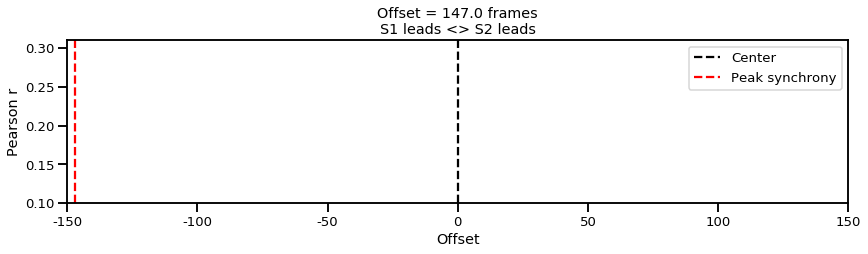

In [109]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = dftest2['cpu_user_pct']
d2 = dftest2['load_1min']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,300], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);
plt.legend()

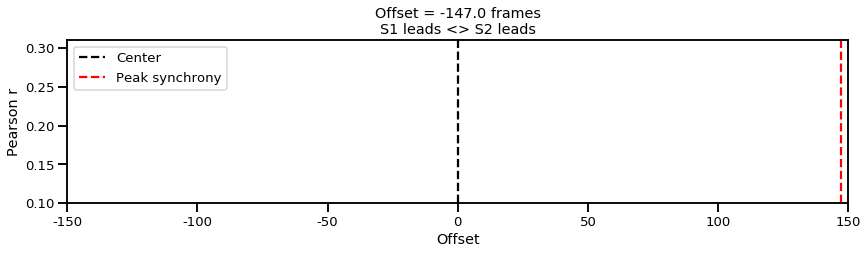

In [110]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = dftest2['cpu_user_pct']
d2 = dftest2['diskio_serviceTime']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,300], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);
plt.legend()

# Windowed time lagged cross correlation

/home/smartopsai/achyuta/venv3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/smartopsai/achyuta/venv3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


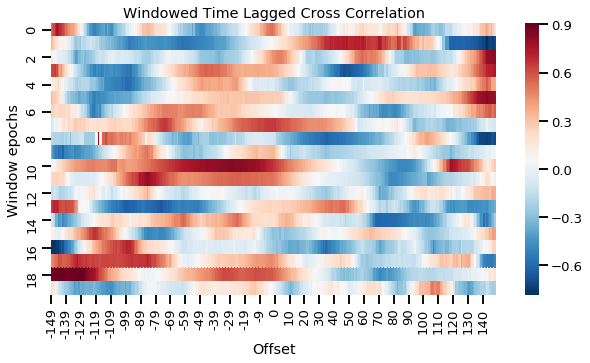

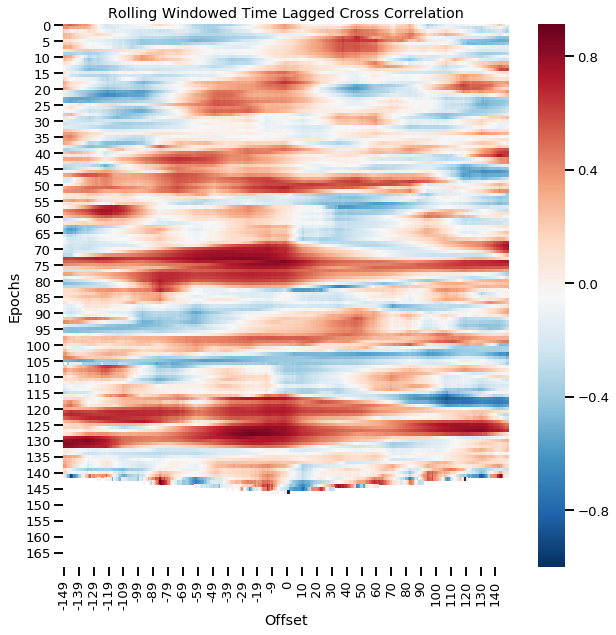

In [100]:
df_num = df.copy()
df_num = df_num.reset_index()
df_num.drop('dateTimeStamp', axis=1, inplace=True)
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = df_num.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df_num['cpu_user_pct'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df_num['load_1min'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Window epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = df_num['cpu_user_pct'].iloc[t_start:t_end]
    d2 = df_num['load_1min'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

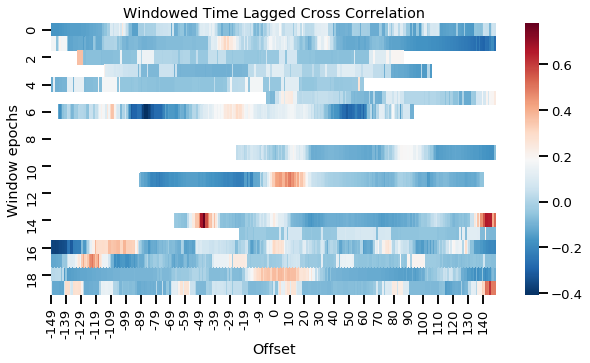

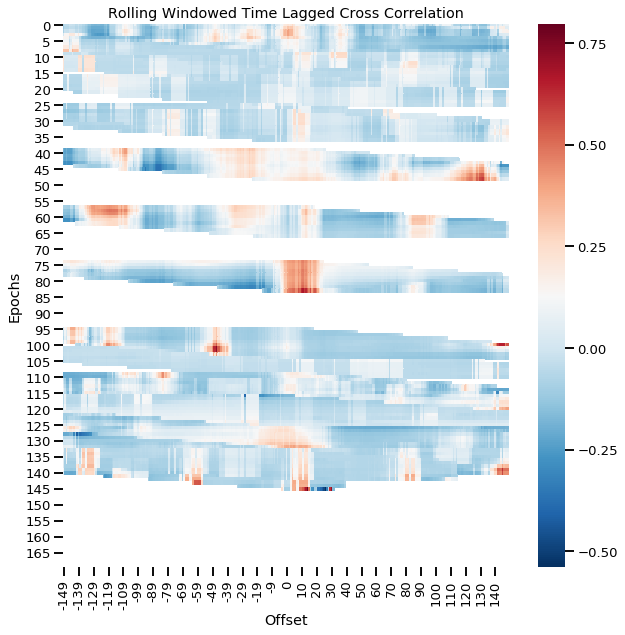

In [102]:
df_num = df.copy()
df_num = df_num.reset_index()
df_num.drop('dateTimeStamp', axis=1, inplace=True)
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = df_num.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df_num['cpu_user_pct'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df_num['diskio_serviceTime'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Window epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = df_num['cpu_user_pct'].iloc[t_start:t_end]
    d2 = df_num['diskio_serviceTime'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

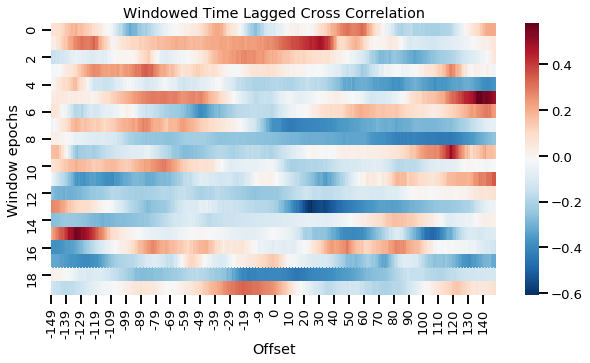

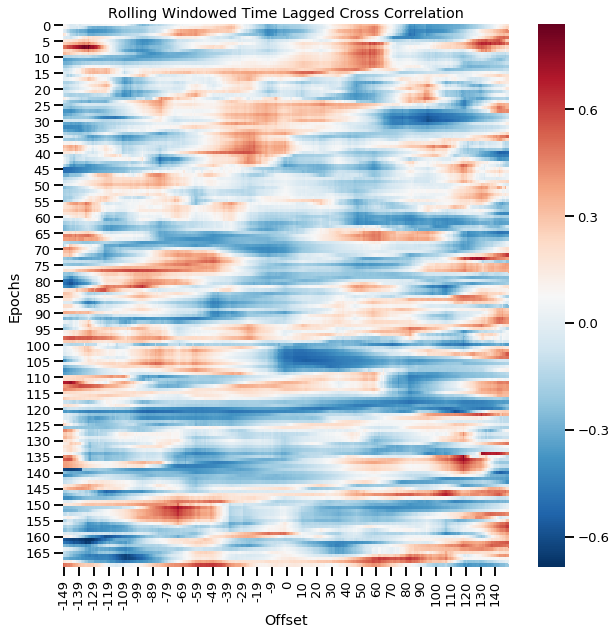

In [111]:
df_num = dftest2.copy()
df_num = df_num.reset_index()
df_num.drop('dateTimeStamp', axis=1, inplace=True)
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = df_num.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df_num['cpu_user_pct'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df_num['load_1min'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Window epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = df_num['cpu_user_pct'].iloc[t_start:t_end]
    d2 = df_num['load_1min'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

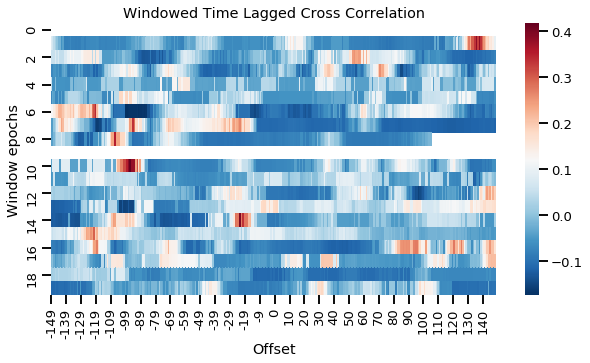

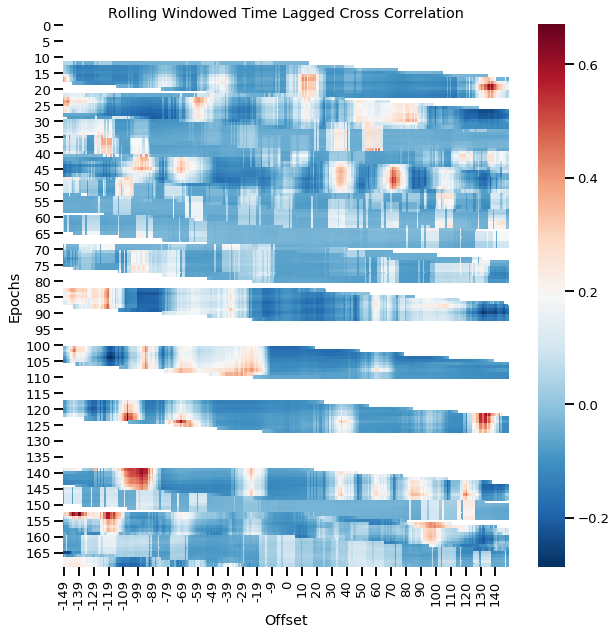

In [112]:
df_num = dftest2.copy()
df_num = df_num.reset_index()
df_num.drop('dateTimeStamp', axis=1, inplace=True)
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = df_num.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df_num['cpu_user_pct'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df_num['diskio_serviceTime'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Window epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = df_num['cpu_user_pct'].iloc[t_start:t_end]
    d2 = df_num['diskio_serviceTime'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

# Dynamic Time Warping

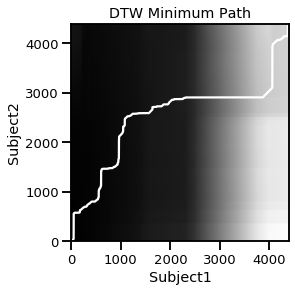

In [105]:
from dtw import dtw,accelerated_dtw

d1 = df['cpu_user_pct'].interpolate().values
d2 = df['load_1min'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title('DTW Minimum Path')
plt.show()

The fact that signal is pulled towards Subject2 indicates that the signal from subject1 is pulled towards subject2, indicating that subject 2 is the leader. 

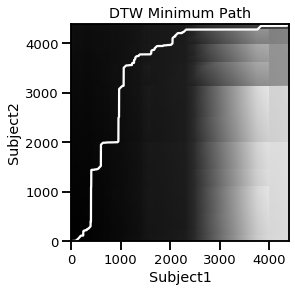

In [106]:
#from dtw import dtw,accelerated_dtw

d1 = df['cpu_user_pct'].interpolate().values
d2 = df['diskio_serviceTime'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title('DTW Minimum Path')
plt.show()

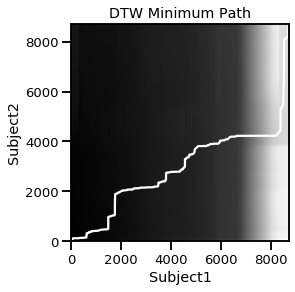

In [113]:
from dtw import dtw,accelerated_dtw

d1 = dftest2['cpu_user_pct'].interpolate().values
d2 = dftest2['load_1min'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title('DTW Minimum Path')
plt.show()

The fact that signal is pulled towards Subject1 indicates that the signal from subject2 is pulled towards subject1, indicating that subject 1 is the leader. 

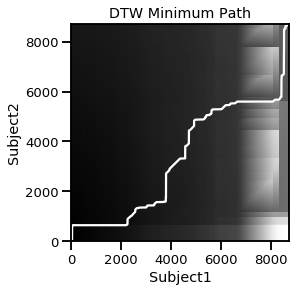

In [114]:
#from dtw import dtw,accelerated_dtw

d1 = dftest2['cpu_user_pct'].interpolate().values
d2 = dftest2['diskio_serviceTime'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title('DTW Minimum Path')
plt.show()

# instantaneous phase synchrony

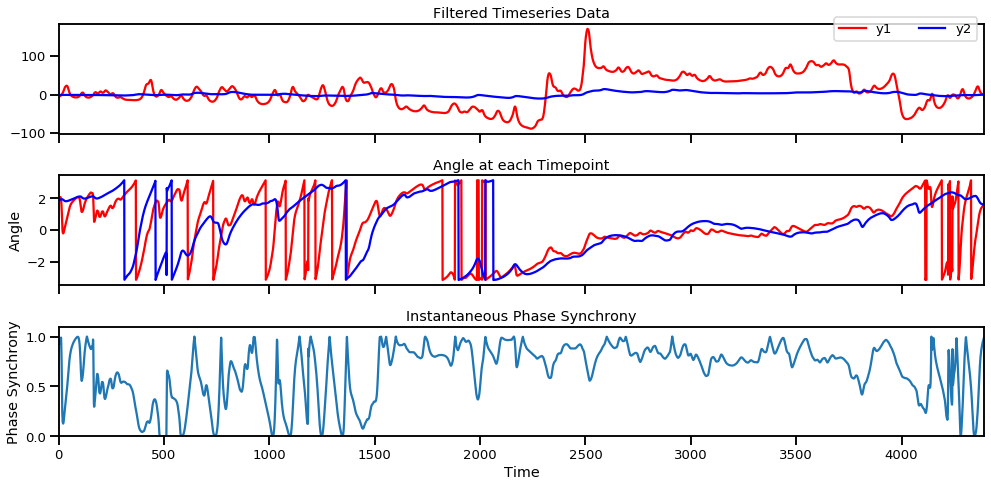

In [107]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = df['cpu_user_pct'].interpolate().values
d2 = df['load_1min'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

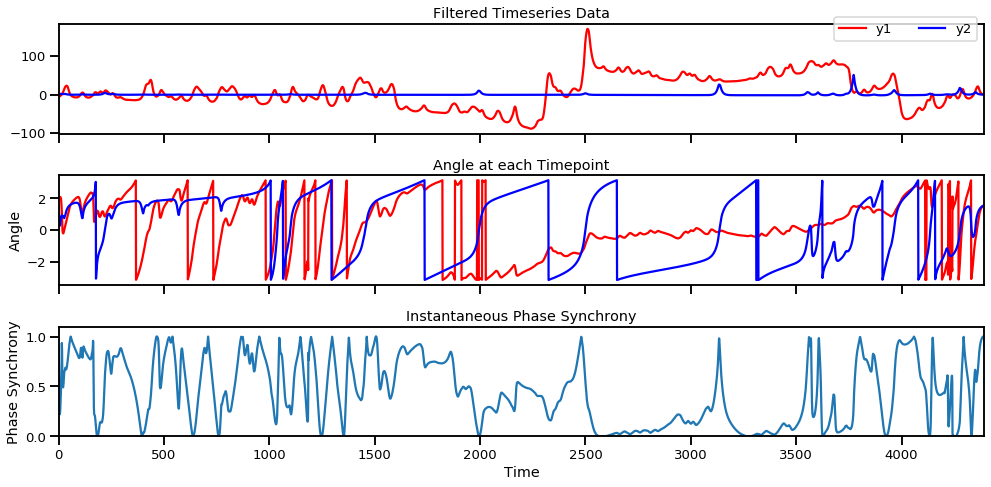

In [108]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = df['cpu_user_pct'].interpolate().values
d2 = df['diskio_serviceTime'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

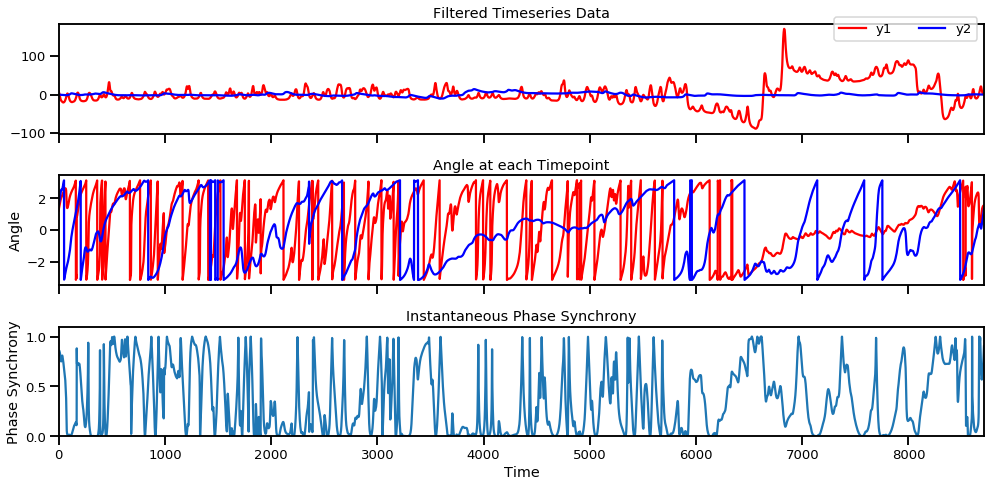

In [115]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = dftest2['cpu_user_pct'].interpolate().values
d2 = dftest2['load_1min'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

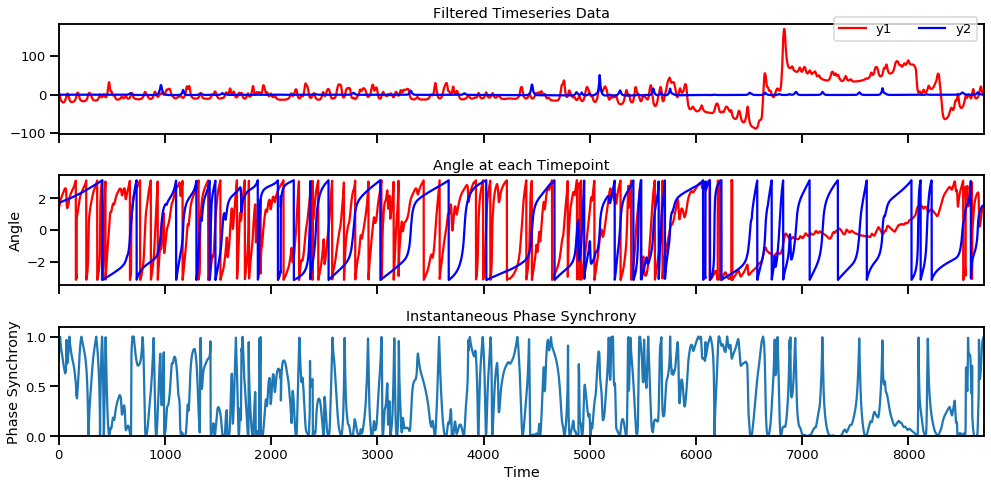

In [116]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = dftest2['cpu_user_pct'].interpolate().values
d2 = dftest2['diskio_serviceTime'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

# END

# Pearson correlation

Pandas computed Pearson r: 0.2058774513561943
Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51


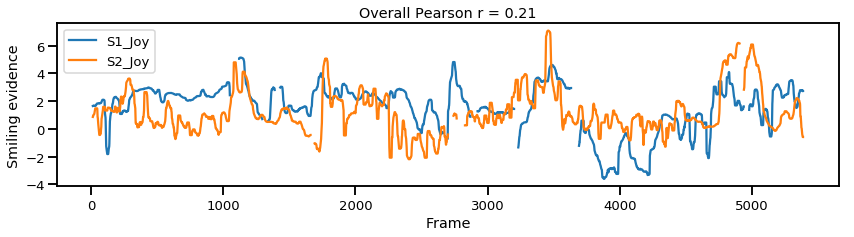

In [132]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_context('talk',font_scale=.8)

df = pd.read_csv('synchrony_sample.csv')
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(df.dropna()['S1_Joy'], df.dropna()['S2_Joy'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Text(0.5,0.98,'Smiling data and rolling window correlation')

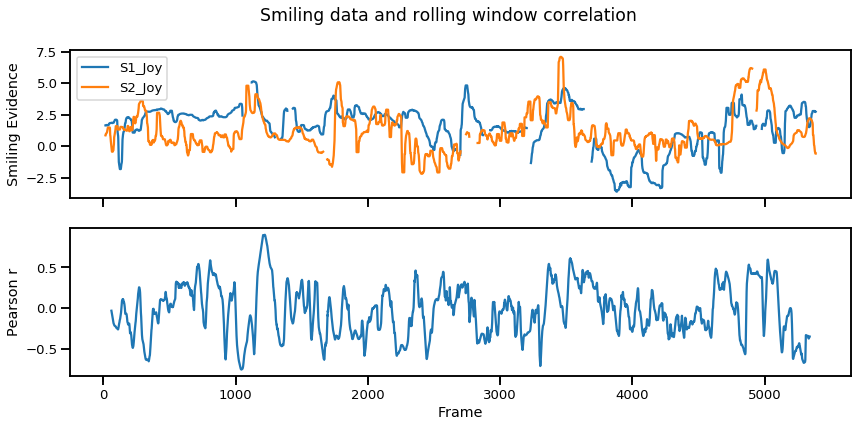

In [93]:
# Set window size to compute moving window synchrony.
r_window_size = 120
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['S1_Joy'].rolling(window=r_window_size, center=True).corr(df_interpolated['S2_Joy'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

# Time Lagged Cross Correlation

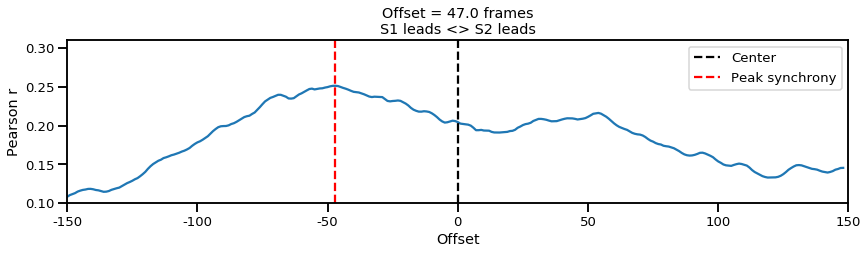

In [113]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['S1_Joy']
d2 = df['S2_Joy']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,300], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);
plt.legend()

## Windowed time lagged cross correlation

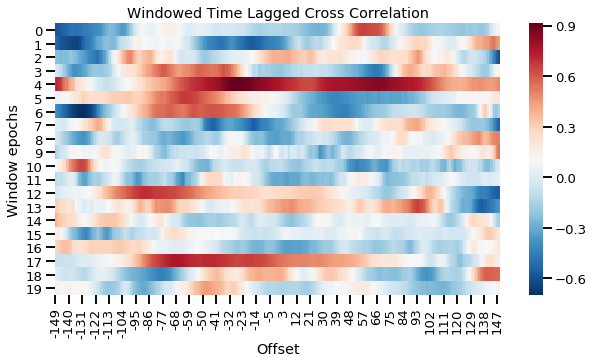

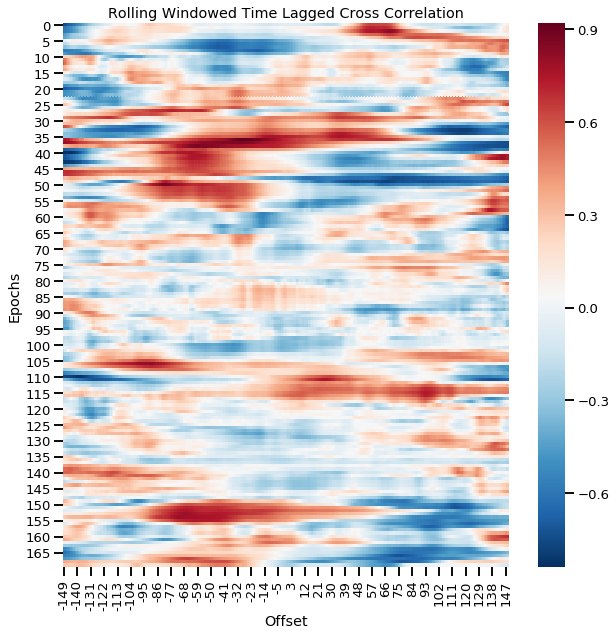

In [120]:
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df['S1_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Window epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = df['S1_Joy'].iloc[t_start:t_end]
    d2 = df['S2_Joy'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,300], xlabel='Offset',ylabel='Epochs')
ax.set_xticklabels([int(item-150) for item in ax.get_xticks()]);

# Dynamic Time Warping

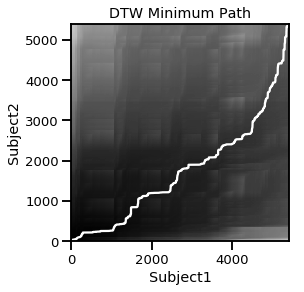

In [123]:
from dtw import dtw,accelerated_dtw

d1 = df['S1_Joy'].interpolate().values
d2 = df['S2_Joy'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title('DTW Minimum Path')
plt.show()

The fact that signal is pulled towards Subject1 indicates that the signal from subject 2 is pulled towards subject1, indicating that subject 1 is the leader. 

# instantaneous phase synchrony

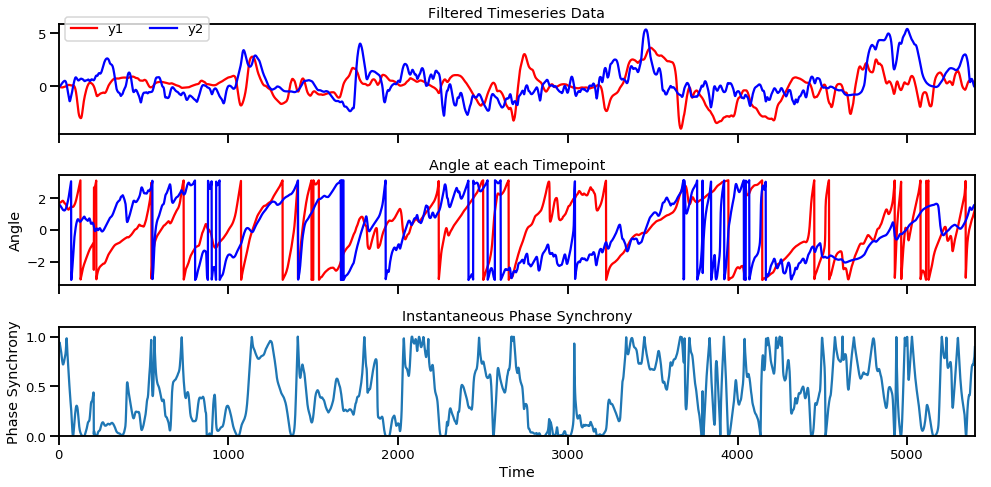

In [131]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = df['S1_Joy'].interpolate().values
d2 = df['S2_Joy'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()